In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## EDA:

In [2]:
df = pd.read_excel('Ratings_prediction_data.xlsx')

In [3]:
df

,Unnamed: 0,Rating,Review
0,0,5.0,Overall nice
1,1,5.0,Using it from day one and fully satisfied in a...
2,2,1.0,Not working key board and automatic typing one...
3,3,5.0,Best Laptop for basic computing on quad core p...
4,4,4.0,Good Option with some cons
...,...,...,...
27201,27201,4.0,Nice product
27202,27202,5.0,Worth every penny
27203,27203,5.0,Brilliant
27204,27204,3.0,Terrific


In [4]:
df = df.drop('Unnamed: 0' ,axis = 1)

In [5]:
#Statistical summary of train dataset
df.describe()

,Rating
count,27206.000000
mean,4.271543
std,1.025159
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df.shape

(27206, 2)

#### We have 27206 data rows and 2 columns in the training dataframe.

In [7]:
#Column Data type in training dataframe 
df.dtypes

Rating    float64
Review     object
dtype: object

#### Point to note here is that all columns are not numeric

### Checking Null values in Training Dataframe:

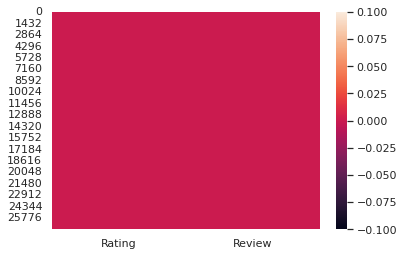

In [8]:
#Checking null values using heatmap
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull())
plt.show()

In [9]:
#Total number of null values in complete train dataset
df.isnull().sum().sum()

0

In [10]:
#number of null values in each column
df.isnull().sum()

Rating    0
Review    0
dtype: int64

#### As we can see there are no NULL values in train dataset

In [11]:
df['Rating'] = df['Rating'].round(0)

In [12]:
#checking the count of the distinct rating
df['Rating'].value_counts()

5.0    14235
4.0     9378
3.0     1840
1.0     1502
2.0      251
Name: Rating, dtype: int64

### Punctuation Removal

In [13]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['Review']= df['Review'].apply(lambda x:remove_punctuation(x))
df

,Rating,Review
0,5.0,Overall nice
1,5.0,Using it from day one and fully satisfied in a...
2,1.0,Not working key board and automatic typing one...
3,5.0,Best Laptop for basic computing on quad core p...
4,4.0,Good Option with some cons
...,...,...
27201,4.0,Nice product
27202,5.0,Worth every penny
27203,5.0,Brilliant
27204,3.0,Terrific


### Lowering the text

In [15]:
df['Review']= df['Review'].apply(lambda x: x.lower())

In [16]:
df

,Rating,Review
0,5.0,overall nice
1,5.0,using it from day one and fully satisfied in a...
2,1.0,not working key board and automatic typing one...
3,5.0,best laptop for basic computing on quad core p...
4,4.0,good option with some cons
...,...,...
27201,4.0,nice product
27202,5.0,worth every penny
27203,5.0,brilliant
27204,3.0,terrific


### Tokenization

In [17]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
#applying function to the column
df['Review_tokenized']= df['Review'].apply(lambda x: tokenization(x))

In [18]:
df = df.drop('Review', axis=1)
df

,Rating,Review_tokenized
0,5.0,"[overall, nice]"
1,5.0,"[using, it, from, day, one, and, fully, satisf..."
2,1.0,"[not, working, key, board, and, automatic, typ..."
3,5.0,"[best, laptop, for, basic, computing, on, quad..."
4,4.0,"[good, option, with, some, cons]"
...,...,...
27201,4.0,"[nice, product]"
27202,5.0,"[worth, every, penny]"
27203,5.0,[brilliant]
27204,3.0,[terrific]


### Stop word removal

In [19]:
#importing nlp library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [22]:
#applying the function
df['Review_stop']= df['Review_tokenized'].apply(lambda x:remove_stopwords(x))
df = df.drop('Review_tokenized', axis=1)
df

,Rating,Review_stop
0,5.0,"[overall, nice]"
1,5.0,"[using, day, one, fully, satisfied, aspects]"
2,1.0,"[working, key, board, automatic, typing, one, ..."
3,5.0,"[best, laptop, basic, computing, quad, core, p..."
4,4.0,"[good, option, cons]"
...,...,...
27201,4.0,"[nice, product]"
27202,5.0,"[worth, every, penny]"
27203,5.0,[brilliant]
27204,3.0,[terrific]


### Stemming

In [23]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [24]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['Review_stemmed']=df['Review_stop'].apply(lambda x: stemming(x))
df

,Rating,Review_stop,Review_stemmed
0,5.0,"[overall, nice]","[overal, nice]"
1,5.0,"[using, day, one, fully, satisfied, aspects]","[use, day, one, fulli, satisfi, aspect]"
2,1.0,"[working, key, board, automatic, typing, one, ...","[work, key, board, automat, type, one, month, ..."
3,5.0,"[best, laptop, basic, computing, quad, core, p...","[best, laptop, basic, comput, quad, core, proc..."
4,4.0,"[good, option, cons]","[good, option, con]"
...,...,...,...
27201,4.0,"[nice, product]","[nice, product]"
27202,5.0,"[worth, every, penny]","[worth, everi, penni]"
27203,5.0,[brilliant],[brilliant]
27204,3.0,[terrific],[terrif]


### Lemmatization

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/dell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [27]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['Review_lemmatized']=df['Review_stop'].apply(lambda x:lemmatizer(x))
df = df.drop('Review_stop', axis=1)
df

,Rating,Review_stemmed,Review_lemmatized
0,5.0,"[overal, nice]","[overall, nice]"
1,5.0,"[use, day, one, fulli, satisfi, aspect]","[using, day, one, fully, satisfied, aspect]"
2,1.0,"[work, key, board, automat, type, one, month, ...","[working, key, board, automatic, typing, one, ..."
3,5.0,"[best, laptop, basic, comput, quad, core, proc...","[best, laptop, basic, computing, quad, core, p..."
4,4.0,"[good, option, con]","[good, option, con]"
...,...,...,...
27201,4.0,"[nice, product]","[nice, product]"
27202,5.0,"[worth, everi, penni]","[worth, every, penny]"
27203,5.0,[brilliant],[brilliant]
27204,3.0,[terrif],[terrific]


### Focusing on Lemmatization

In [28]:
df = df.drop('Review_stemmed', axis=1)

In [29]:
df1 = df.copy()
df1 = df1.drop('Rating', axis=1)

In [30]:
df1

,Review_lemmatized
0,"[overall, nice]"
1,"[using, day, one, fully, satisfied, aspect]"
2,"[working, key, board, automatic, typing, one, ..."
3,"[best, laptop, basic, computing, quad, core, p..."
4,"[good, option, con]"
...,...
27201,"[nice, product]"
27202,"[worth, every, penny]"
27203,[brilliant]
27204,[terrific]


### Bag of words:

In [31]:
# Counting occurence of each word
import collections
word2count = collections.Counter([y for x in df1.values.flatten() for y in x])
word2count

Counter({'overall': 263,
         'nice': 1285,
         'using': 45,
         'day': 79,
         'one': 270,
         'fully': 14,
         'satisfied': 45,
         'aspect': 1,
         'working': 148,
         'key': 13,
         'board': 1,
         'automatic': 2,
         'typing': 13,
         'month': 88,
         'use': 252,
         'problem': 60,
         'best': 1155,
         'laptop': 370,
         'basic': 76,
         'computing': 1,
         'quad': 1,
         'core': 2,
         'processor': 17,
         'good': 4335,
         'option': 85,
         'con': 33,
         'slim': 14,
         'thin': 2,
         'stylish': 1,
         'student': 12,
         'm': 3,
         'office': 39,
         'activated': 2,
         'microsoft': 1,
         'even': 29,
         'though': 3,
         'listed': 2,
         'spec': 2,
         'never': 30,
         'buy': 1007,
         'start': 30,
         'lagging': 1,
         'first': 3,
         'doubt': 2,
         'mind': 2

In [32]:
# Frequent words
import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
freq_words

['good',
 'product',
 'purchase',
 'great',
 'awesome',
 'nice',
 'worth',
 'best',
 'terrific',
 'buy',
 'quality',
 'wonderful',
 'price',
 'money',
 'watch',
 'excellent',
 'must',
 'brilliant',
 'every',
 'perfect',
 'super',
 'phone',
 'printer',
 'penny',
 'simply',
 'mindblowing',
 'market',
 'recommended',
 'highly',
 'wow',
 'fabulous',
 'pretty',
 'work',
 'budget',
 'valueformoney',
 'choice',
 'delightful',
 'classy',
 '',
 'laptop',
 'value',
 'battery',
 'really',
 'dont',
 'headphone',
 'easy',
 'decent',
 'one',
 'overall',
 'smart',
 'use',
 'camera',
 'sound',
 'okay',
 'bad',
 'range',
 'fair',
 'average',
 'print',
 'waste',
 'poor',
 'love',
 'better',
 'amazing',
 'well',
 'working',
 'job',
 'low',
 'like',
 'terrible',
 'need',
 'disappointed',
 'comfortable',
 'review',
 'worst',
 'expected',
 'fast',
 'little',
 'get',
 'looking',
 'worthless',
 'experience',
 'bass',
 'normal',
 'set',
 'life',
 'time',
 'mobile',
 'horrible',
 'far',
 'month',
 'unsatisfacto

In [39]:
X = []
for i in range(0,27206) :
    vector = []
    for word in freq_words:
        if word in df1.Review_lemmatized[i]:
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
X = np.asarray(X)

In [40]:
df3 = pd.DataFrame(X, columns=[freq_words])
df3

,good,product,purchase,great,awesome,nice,worth,best,terrific,buy,...,month,unsatisfactory,affordable,service,useless,option,small,setup,ok,support
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27201,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27202,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27204,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df3.insert(100,'Rating',df.Rating)

In [42]:
df3

,good,product,purchase,great,awesome,nice,worth,best,terrific,buy,...,unsatisfactory,affordable,service,useless,option,small,setup,ok,support,Rating
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27201,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
27202,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
27203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
27204,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.0


In [43]:
df3.dtypes

good          int64
product       int64
purchase      int64
great         int64
awesome       int64
             ...   
small         int64
setup         int64
ok            int64
support       int64
Rating      float64
Length: 101, dtype: object

#### As we can see all columns are numeric datatype

### Density plots :

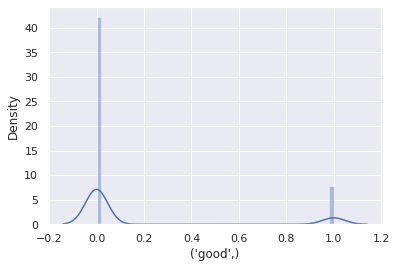



*****************************************************************************************************




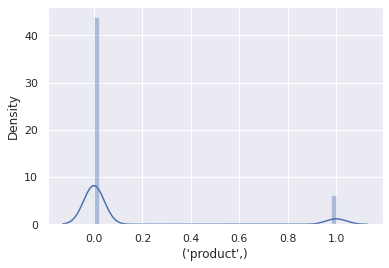



*****************************************************************************************************




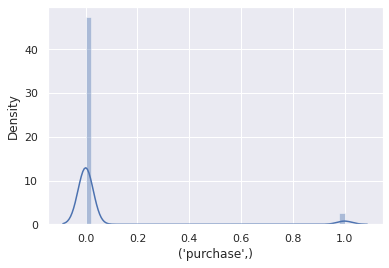



*****************************************************************************************************




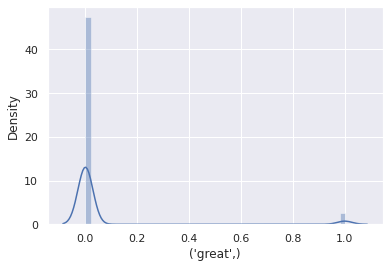



*****************************************************************************************************




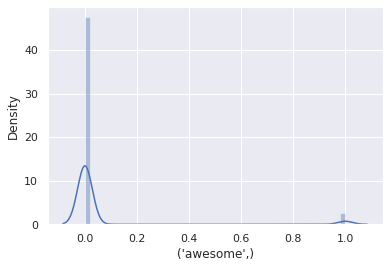



*****************************************************************************************************




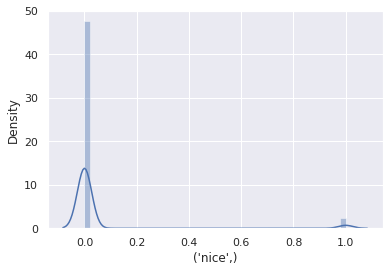



*****************************************************************************************************




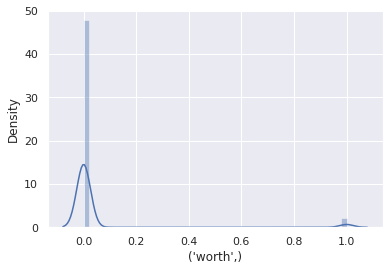



*****************************************************************************************************




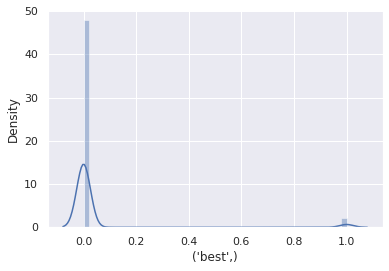



*****************************************************************************************************




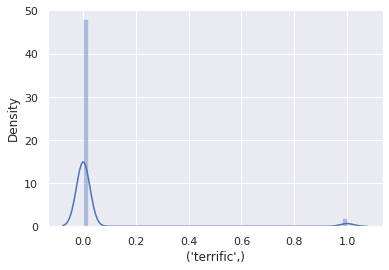



*****************************************************************************************************




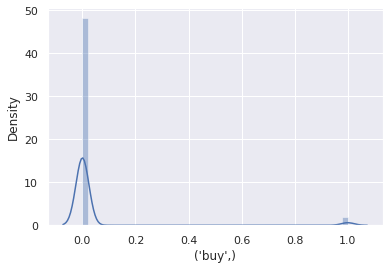



*****************************************************************************************************




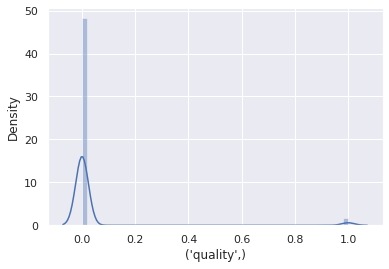



*****************************************************************************************************




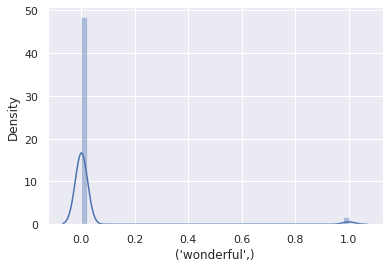



*****************************************************************************************************




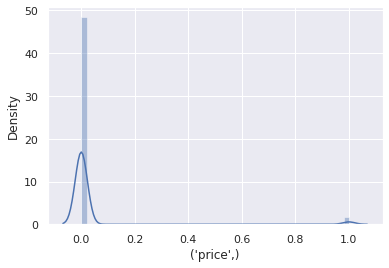



*****************************************************************************************************




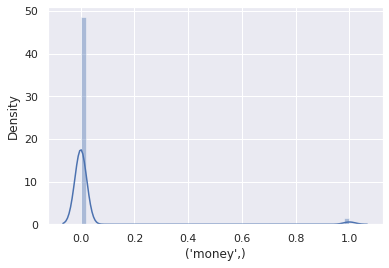



*****************************************************************************************************




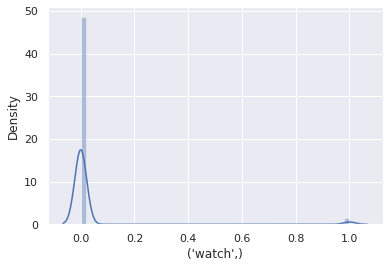



*****************************************************************************************************




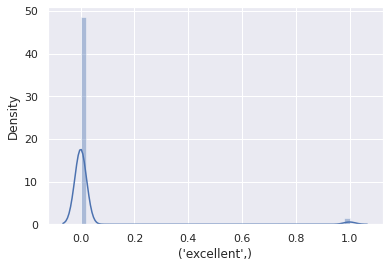



*****************************************************************************************************




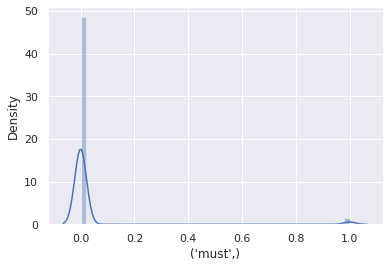



*****************************************************************************************************




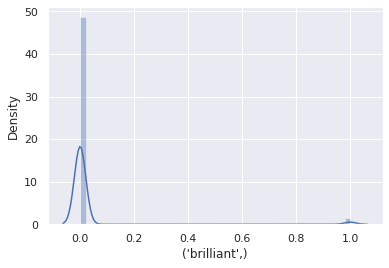



*****************************************************************************************************




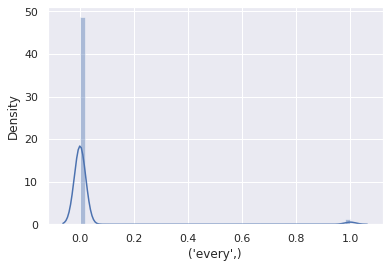



*****************************************************************************************************




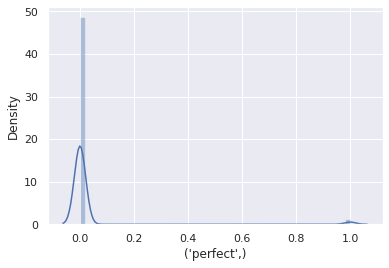



*****************************************************************************************************




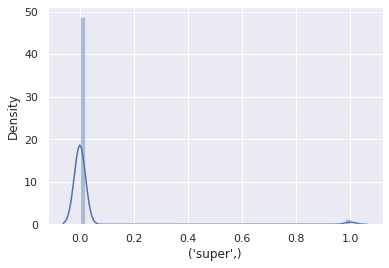



*****************************************************************************************************




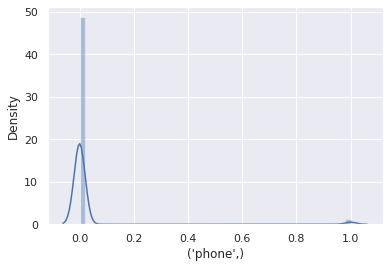



*****************************************************************************************************




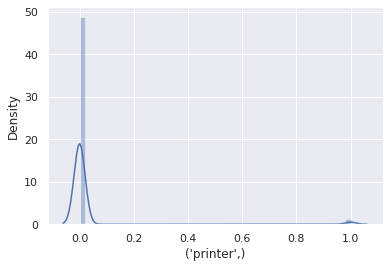



*****************************************************************************************************




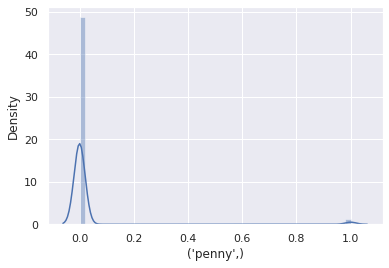



*****************************************************************************************************




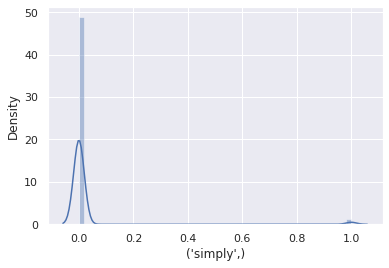



*****************************************************************************************************




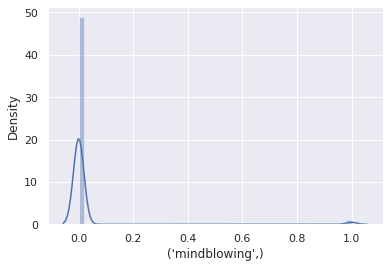



*****************************************************************************************************




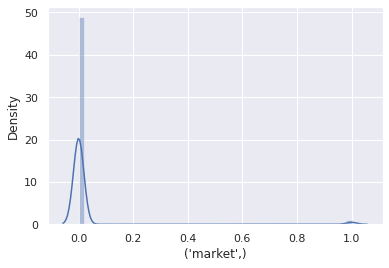



*****************************************************************************************************




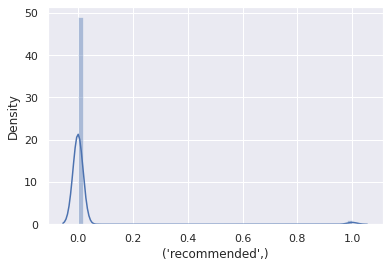



*****************************************************************************************************




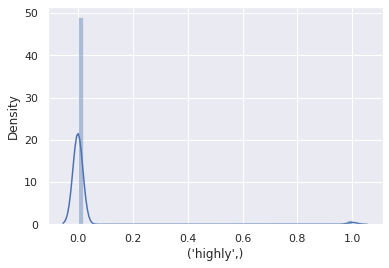



*****************************************************************************************************




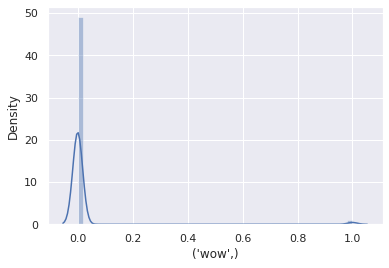



*****************************************************************************************************




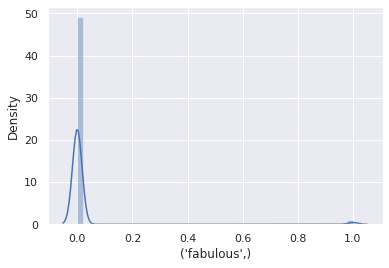



*****************************************************************************************************




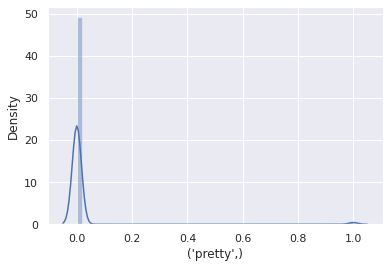



*****************************************************************************************************




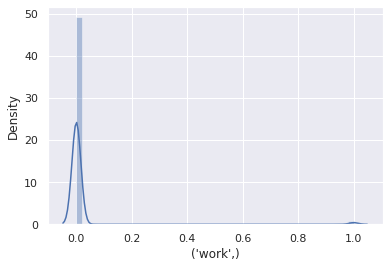



*****************************************************************************************************




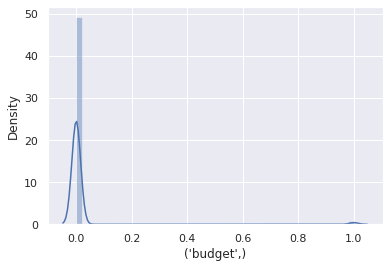



*****************************************************************************************************




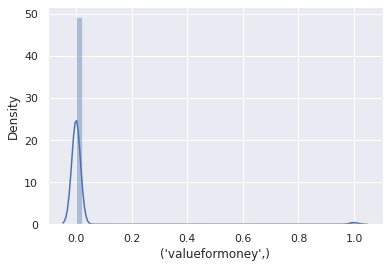



*****************************************************************************************************




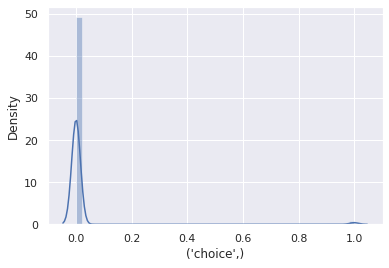



*****************************************************************************************************




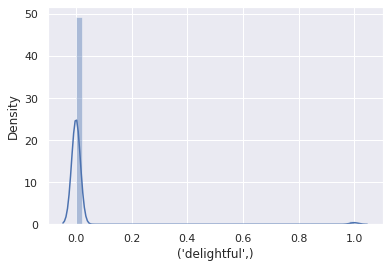



*****************************************************************************************************




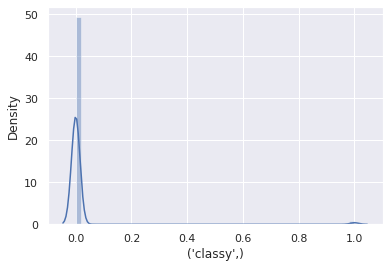



*****************************************************************************************************




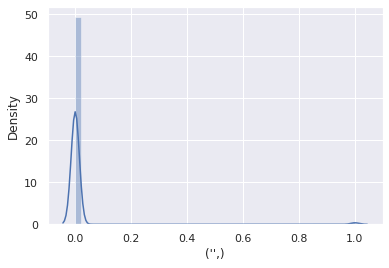



*****************************************************************************************************




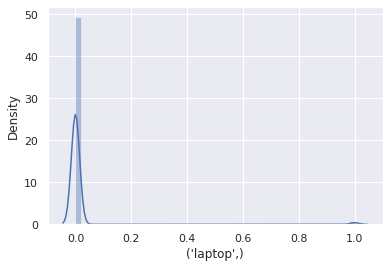



*****************************************************************************************************




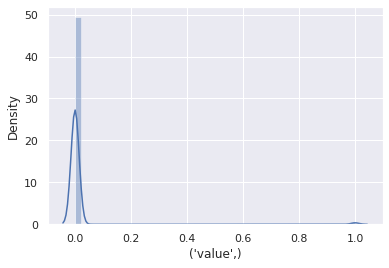



*****************************************************************************************************




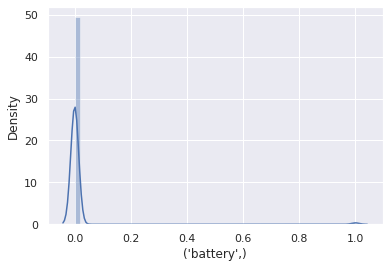



*****************************************************************************************************




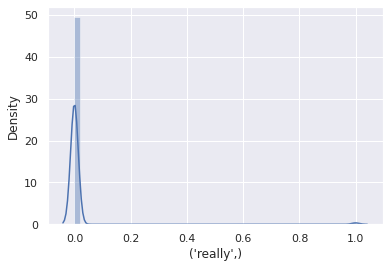



*****************************************************************************************************




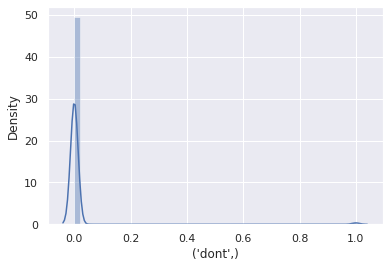



*****************************************************************************************************




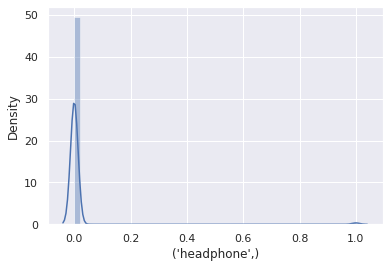



*****************************************************************************************************




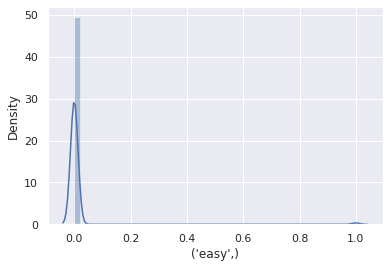



*****************************************************************************************************




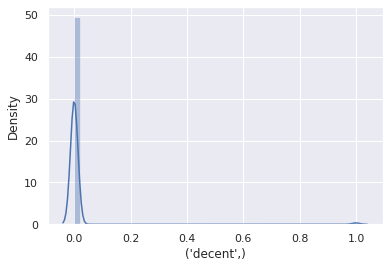



*****************************************************************************************************




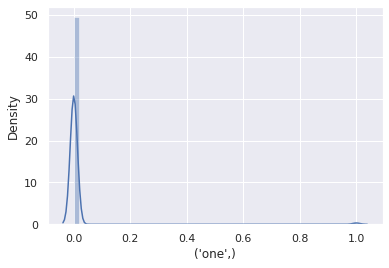



*****************************************************************************************************




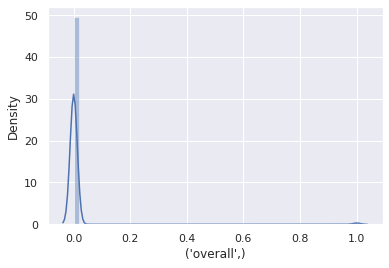



*****************************************************************************************************




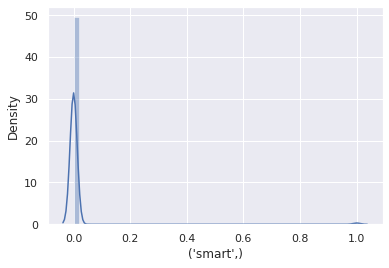



*****************************************************************************************************




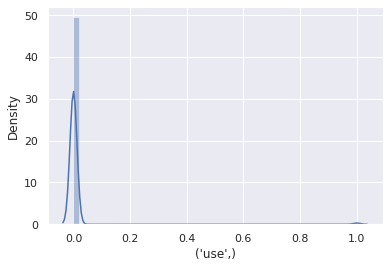



*****************************************************************************************************




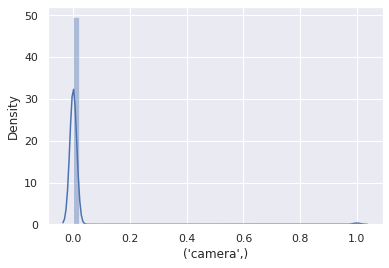



*****************************************************************************************************




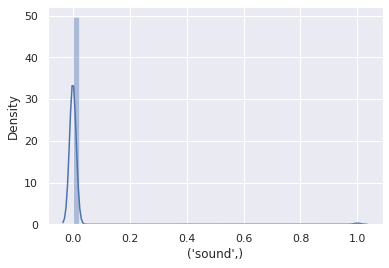



*****************************************************************************************************




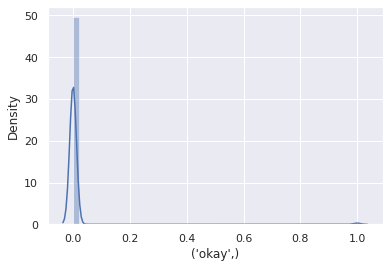



*****************************************************************************************************




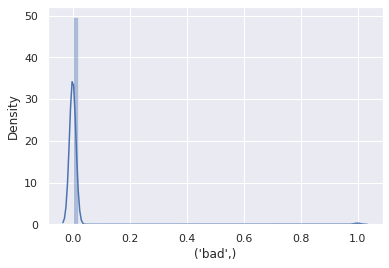



*****************************************************************************************************




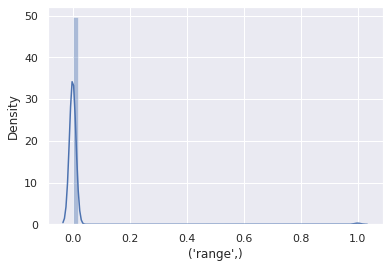



*****************************************************************************************************




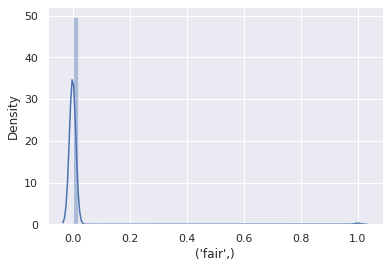



*****************************************************************************************************




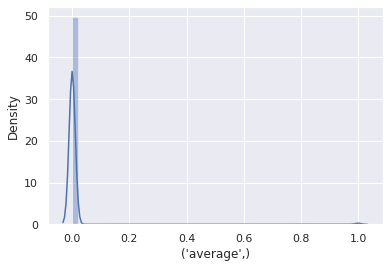



*****************************************************************************************************




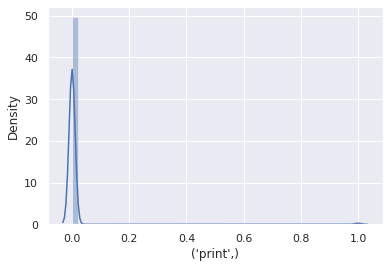



*****************************************************************************************************




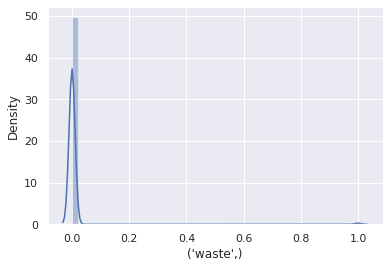



*****************************************************************************************************




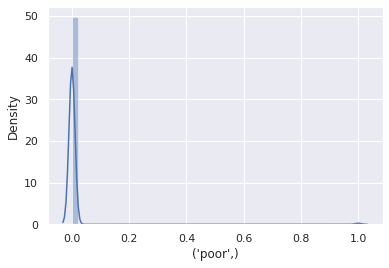



*****************************************************************************************************




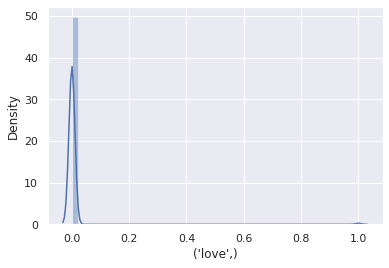



*****************************************************************************************************




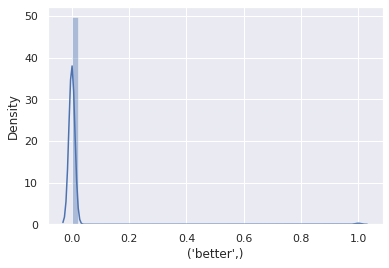



*****************************************************************************************************




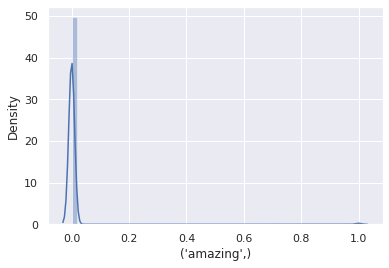



*****************************************************************************************************




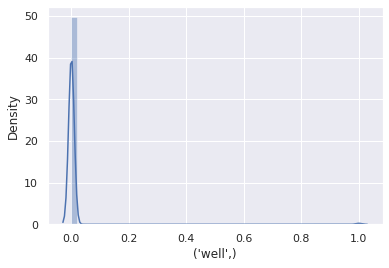



*****************************************************************************************************




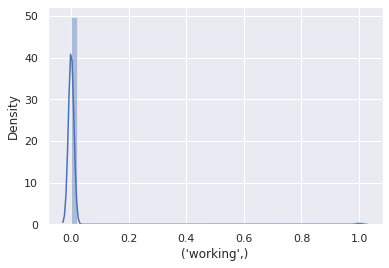



*****************************************************************************************************




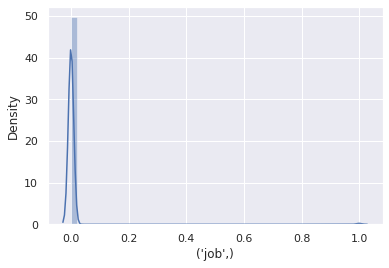



*****************************************************************************************************




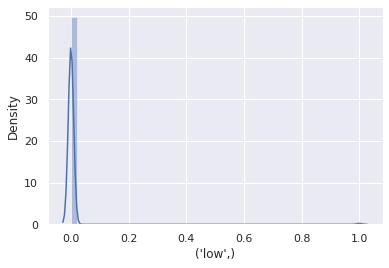



*****************************************************************************************************




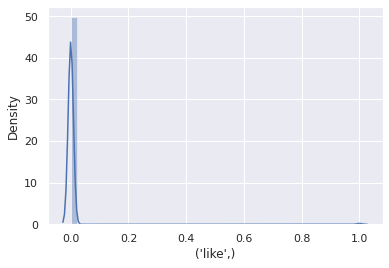



*****************************************************************************************************




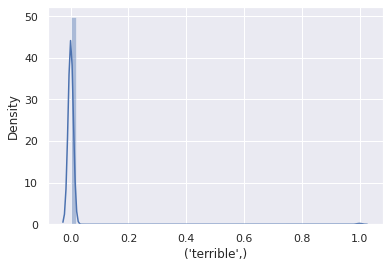



*****************************************************************************************************




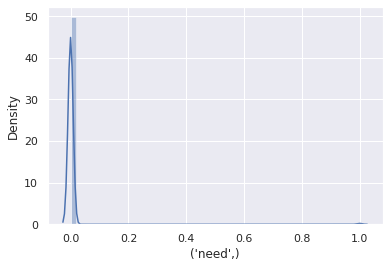



*****************************************************************************************************




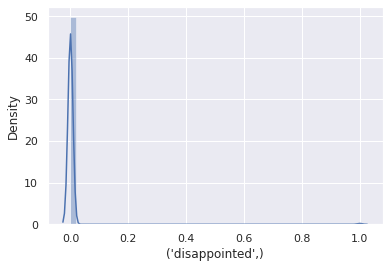



*****************************************************************************************************




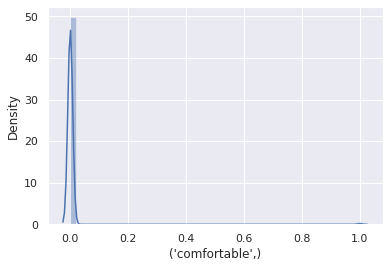



*****************************************************************************************************




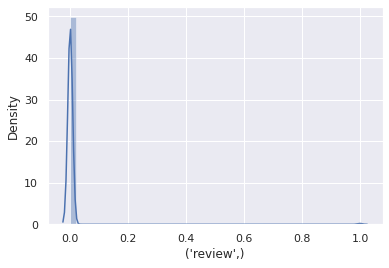



*****************************************************************************************************




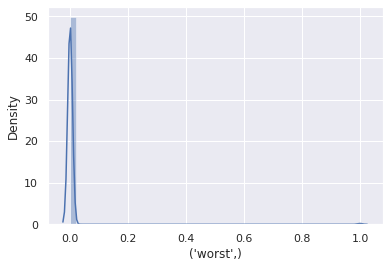



*****************************************************************************************************




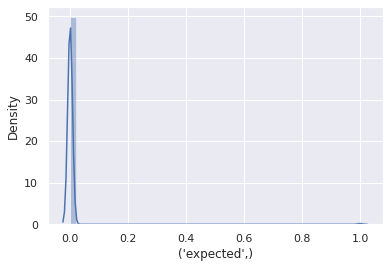



*****************************************************************************************************




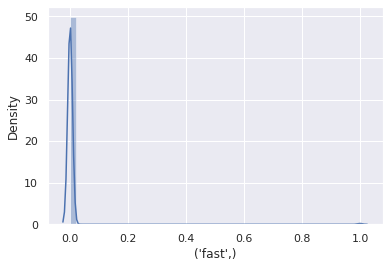



*****************************************************************************************************




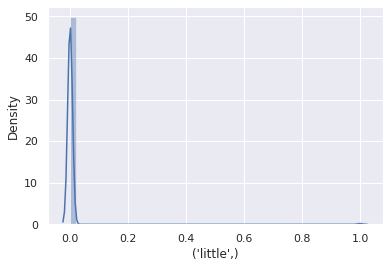



*****************************************************************************************************




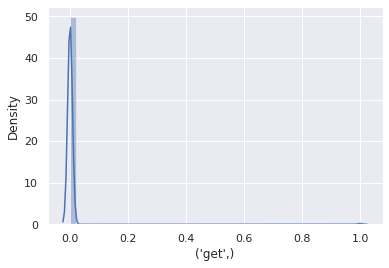



*****************************************************************************************************




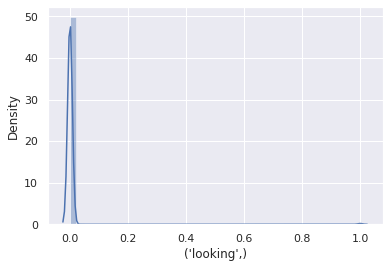



*****************************************************************************************************




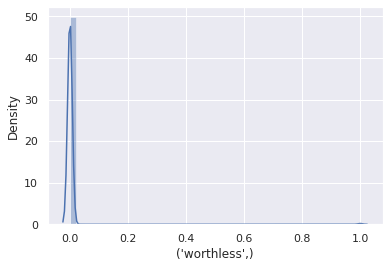



*****************************************************************************************************




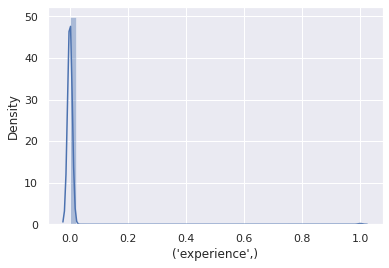



*****************************************************************************************************




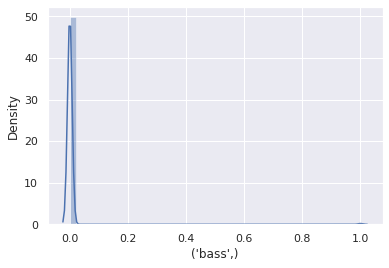



*****************************************************************************************************




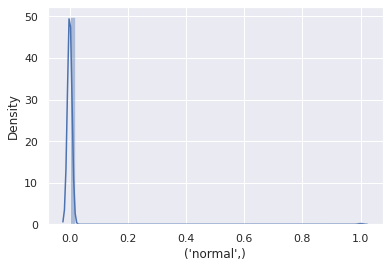



*****************************************************************************************************




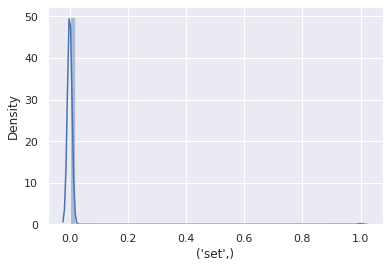



*****************************************************************************************************




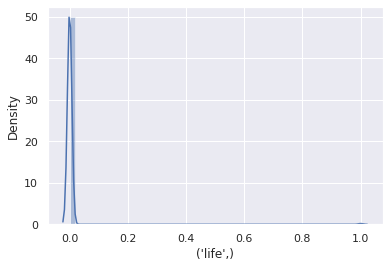



*****************************************************************************************************




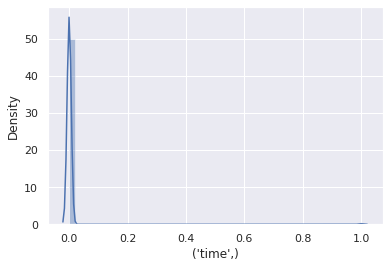



*****************************************************************************************************




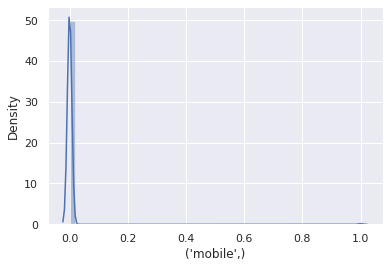



*****************************************************************************************************




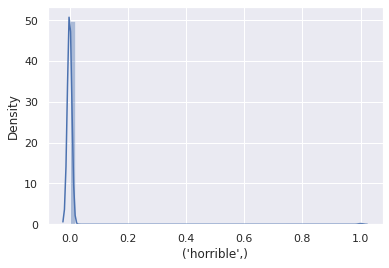



*****************************************************************************************************




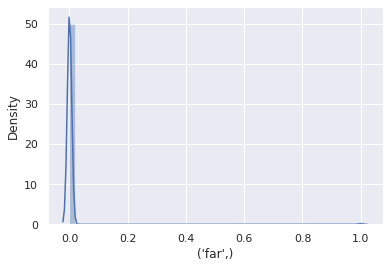



*****************************************************************************************************




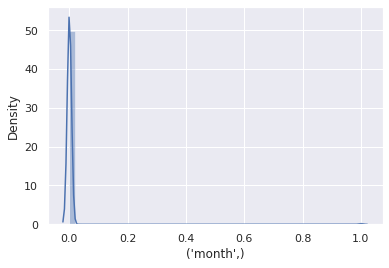



*****************************************************************************************************




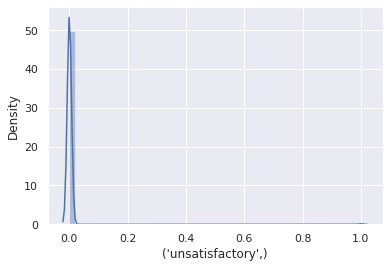



*****************************************************************************************************




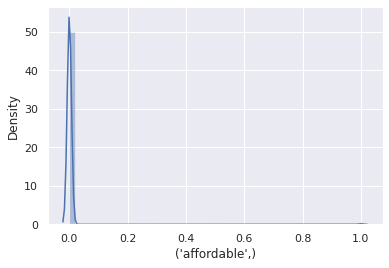



*****************************************************************************************************




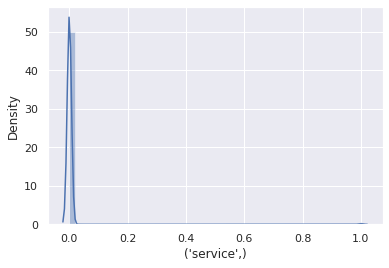



*****************************************************************************************************




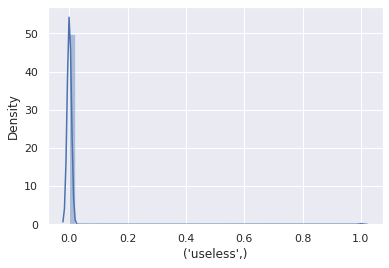



*****************************************************************************************************




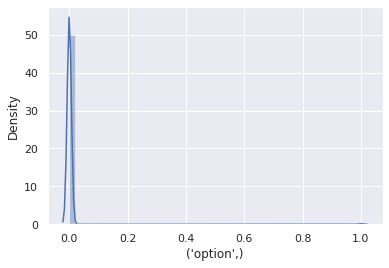



*****************************************************************************************************




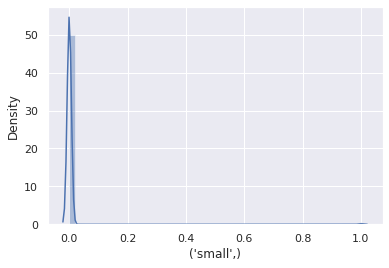



*****************************************************************************************************




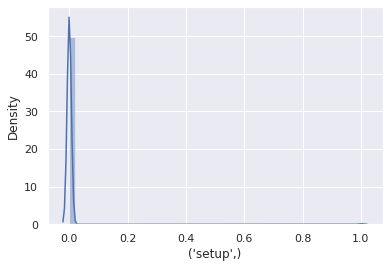



*****************************************************************************************************




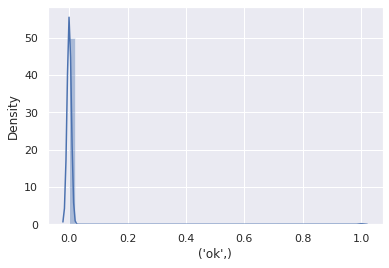



*****************************************************************************************************




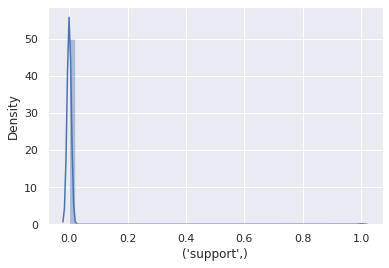



*****************************************************************************************************




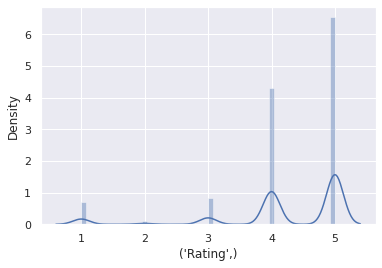



*****************************************************************************************************




In [44]:
for i in df3.columns:
    if df3[i].dtypes != "object":
        sns.set(rc={'figure.figsize':(6,4)})
        sns.distplot(df3[i])
        plt.show()
        print('\n')
        print('*****************************************************************************************************')
        print('\n')

#### Maximum density graphs have mode at 0

#### Visualisation is completed

### Correlations for all target variable dataframes:

<AxesSubplot:xlabel='None'>

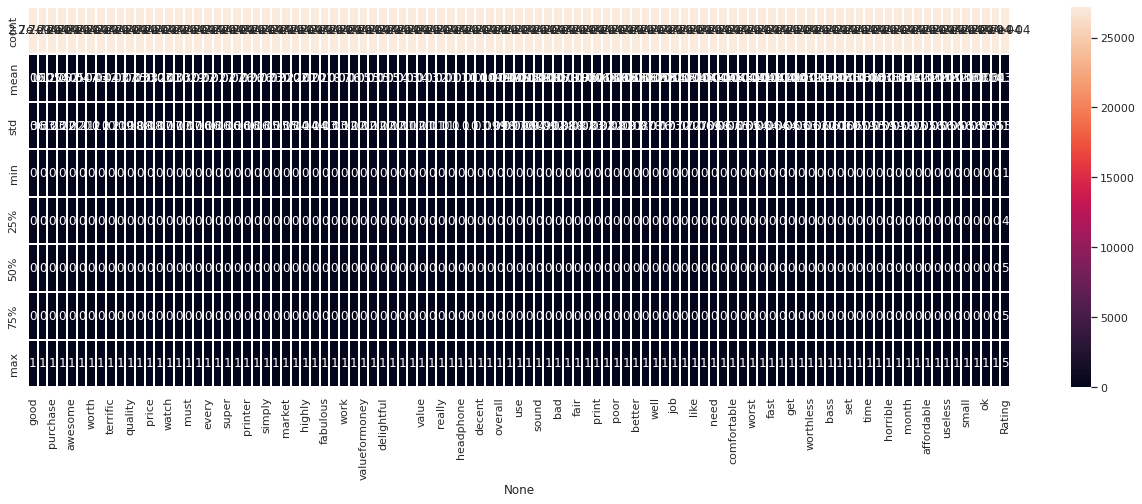

In [45]:
plt.figure(figsize = (22,7))
sns.heatmap(df3.describe(),annot = True, linewidths=0.1)

In [46]:
#Correlation matrix
df3.corr()

,good,product,purchase,great,awesome,nice,worth,best,terrific,buy,...,unsatisfactory,affordable,service,useless,option,small,setup,ok,support,Rating
good,1.000000,0.009814,-0.069163,-0.086640,-0.098701,-0.095699,-0.059835,-0.065361,-0.088323,-0.075059,...,-0.024606,-0.001217,0.002360,-0.024324,0.001147,0.026477,0.032380,0.003568,0.024140,-0.022020
product,0.009814,1.000000,-0.081851,0.194544,-0.068248,0.103455,-0.067697,-0.051253,-0.077172,-0.042789,...,-0.021376,-0.021254,0.026248,0.094329,-0.021007,-0.021007,-0.018869,-0.010627,-0.018594,-0.001719
purchase,-0.069163,-0.081851,1.000000,-0.055234,-0.054374,-0.052983,-0.050286,-0.049273,0.502781,-0.046653,...,-0.013556,-0.013478,-0.013478,-0.013400,-0.013322,-0.013322,-0.013243,-0.013164,-0.010107,0.017692
great,-0.086640,0.194544,-0.055234,1.000000,-0.053741,-0.052365,-0.029318,-0.024949,-0.048369,-0.022523,...,-0.013398,0.030497,-0.013321,-0.013244,0.066626,0.031163,-0.010116,-0.013010,0.026182,0.050326
awesome,-0.098701,-0.068248,-0.054374,-0.053741,1.000000,-0.050876,-0.048287,-0.048092,-0.046993,-0.044798,...,-0.013017,-0.012942,-0.012942,-0.012867,-0.012792,-0.012792,-0.012716,-0.012640,-0.012564,0.043497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small,0.026477,-0.021007,-0.013322,0.031163,-0.012792,-0.012465,-0.011830,-0.011783,-0.011513,-0.010976,...,-0.003189,-0.003171,-0.003171,-0.003153,-0.003134,1.000000,-0.003116,-0.003097,-0.003078,-0.043739
setup,0.032380,-0.018869,-0.013243,-0.010116,-0.012716,-0.012391,-0.011760,-0.011713,-0.011445,-0.010911,...,-0.003170,-0.003152,-0.003152,-0.003134,-0.003116,-0.003116,1.000000,-0.003079,0.009026,-0.029604
ok,0.003568,-0.010627,-0.013164,-0.013010,-0.012640,-0.012317,-0.011690,-0.011643,-0.011377,-0.010845,...,-0.003151,-0.003133,-0.003133,-0.003115,-0.003097,-0.003097,-0.003079,1.000000,-0.003042,-0.017902
support,0.024140,-0.018594,-0.010107,0.026182,-0.012564,-0.012242,-0.011619,-0.011572,-0.011308,-0.010780,...,-0.003132,-0.003114,-0.003114,-0.003096,-0.003078,-0.003078,0.009026,-0.003042,1.000000,-0.040072


<AxesSubplot:xlabel='None', ylabel='None'>

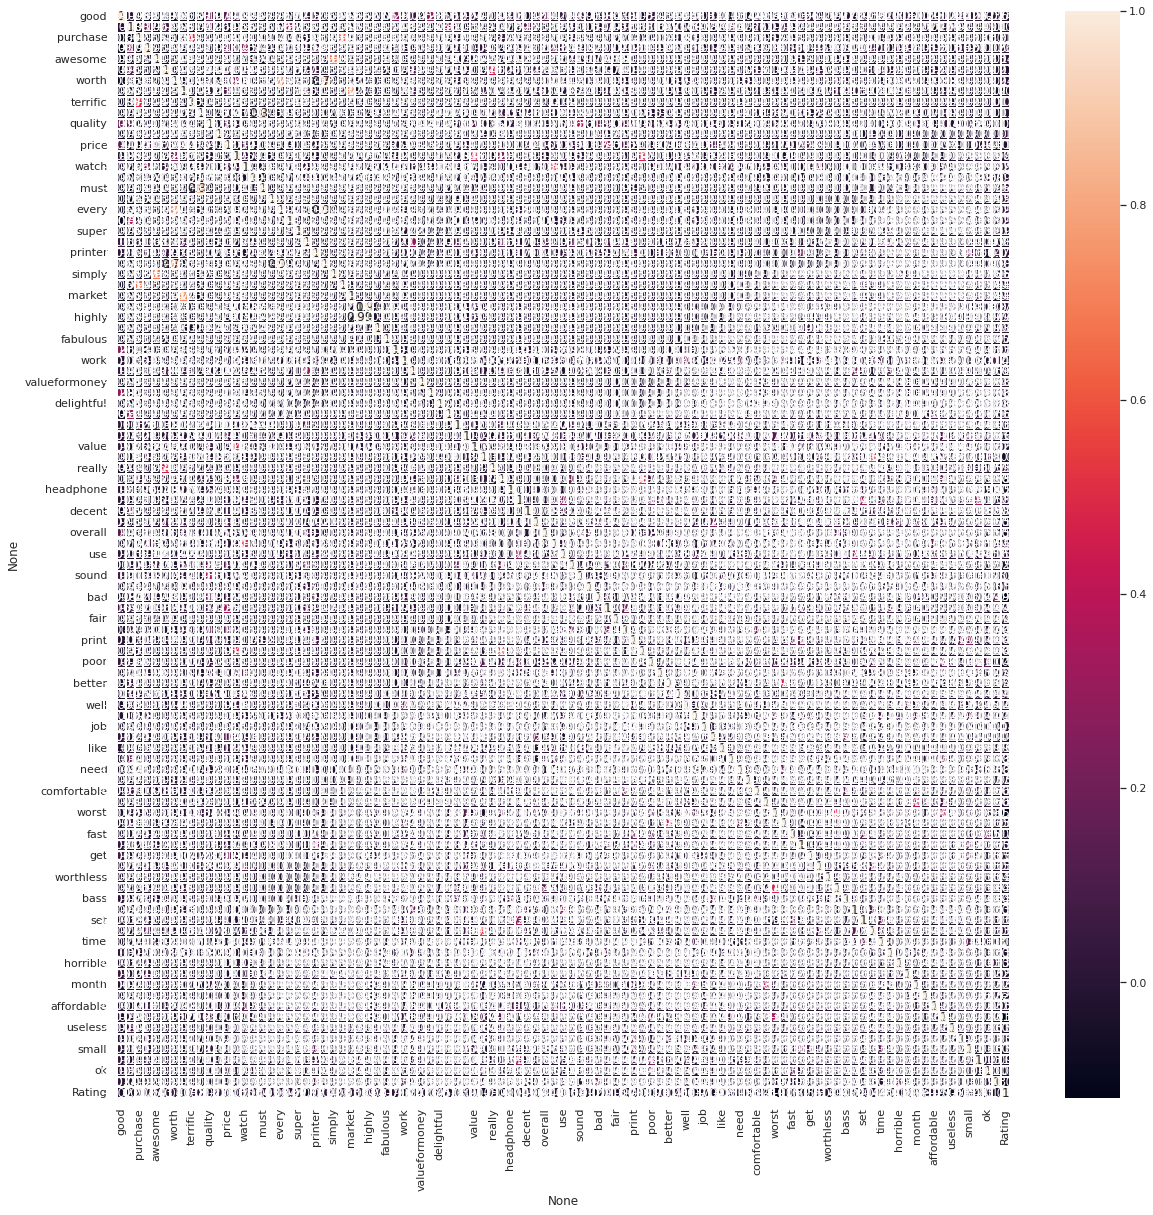

In [47]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (20,20))
sns.heatmap(df3.corr(),annot = True, linewidths=0.1)

#### In correlation matrix and heatmap we can 't see very high correlations.

### Removing Skewness :

In [48]:
#Checking skewness for training dataframe
df3.skew()

good         1.883212
product      2.289811
purchase     3.964614
great        4.016919
awesome      4.148096
              ...    
small       17.807546
setup       17.914224
ok          18.022819
support     18.133388
Rating      -1.842501
Length: 101, dtype: float64

#### Acceptable skewness (-0.65,+0.65)

#### As all continous columns are skewed so we can use tree based algorithm in models rather than removing skewness

### Removing outliers :

In [49]:
#Outlier check
df3.dtypes

good          int64
product       int64
purchase      int64
great         int64
awesome       int64
             ...   
small         int64
setup         int64
ok            int64
support       int64
Rating      float64
Length: 101, dtype: object

good          AxesSubplot(0.125,0.816017;0.0545775x0.0639831)
product     AxesSubplot(0.190493,0.816017;0.0545775x0.0639...
purchase    AxesSubplot(0.255986,0.816017;0.0545775x0.0639...
great       AxesSubplot(0.321479,0.816017;0.0545775x0.0639...
awesome     AxesSubplot(0.386972,0.816017;0.0545775x0.0639...
                                  ...                        
small          AxesSubplot(0.125,0.20178;0.0545775x0.0639831)
setup       AxesSubplot(0.190493,0.20178;0.0545775x0.0639831)
ok          AxesSubplot(0.255986,0.20178;0.0545775x0.0639831)
support     AxesSubplot(0.321479,0.20178;0.0545775x0.0639831)
Rating      AxesSubplot(0.386972,0.20178;0.0545775x0.0639831)
Length: 101, dtype: object

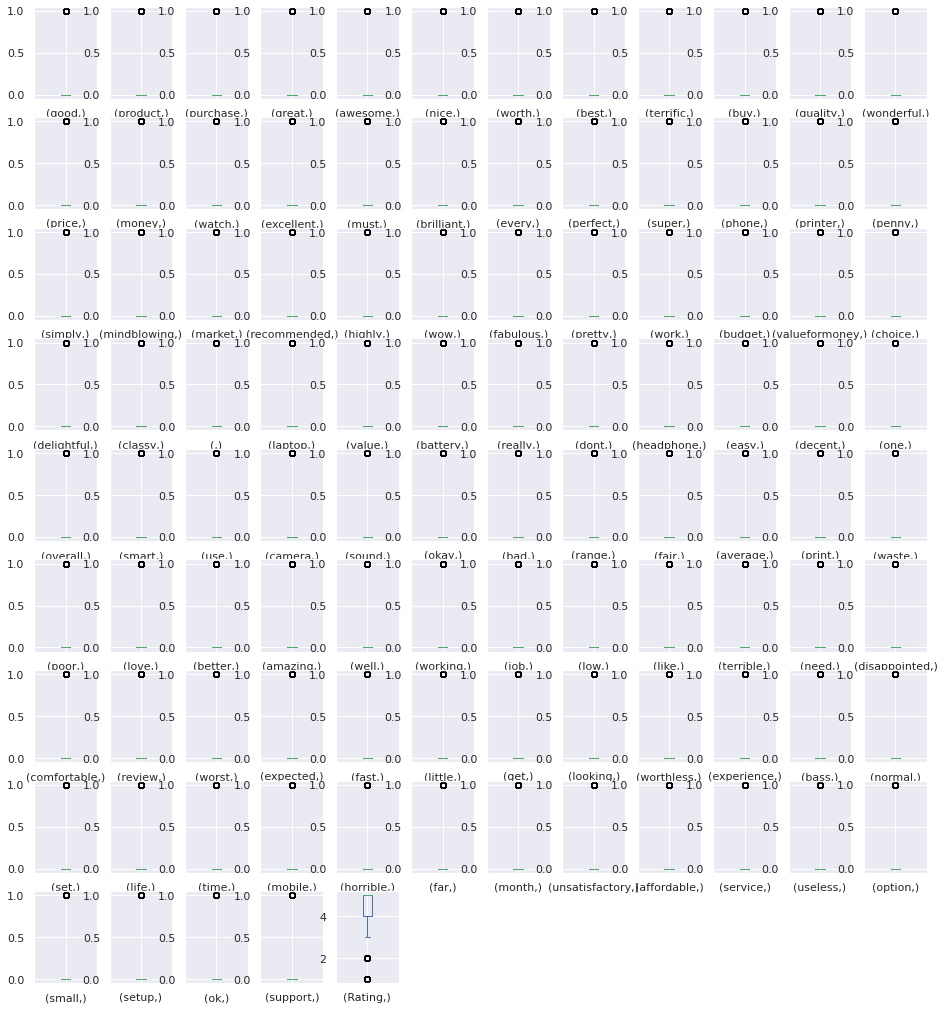

In [50]:
#Checking only for continous data types in training dataframe
df3.plot.box(layout =(10,12),subplots=True,figsize=(16,20))

### No outliers in continous column so now we check with z-score:

In [51]:
#Outlier removal using z-score
df3.shape

(27206, 101)

In [52]:
from scipy.stats import zscore

z = np.abs(zscore(df3))
threshhold = 3
np.where(z>3)

(array([    0,     0,     1, ..., 27203, 27204, 27205]),
 array([ 5, 48, 47, ..., 17,  8, 35]))

In [53]:
df_new_z = df3[(z<3).all(axis = 1)]
df_new_z

,good,product,purchase,great,awesome,nice,worth,best,terrific,buy,...,unsatisfactory,affordable,service,useless,option,small,setup,ok,support,Rating
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
27154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
27167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
27189,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0


In [54]:
#Data Loss
Data_loss = (27206-3235)/27206*100
Data_loss

88.10924060868925

#### Too much data loss for outlier removal so we can use tree training algorithms which are not affected by outliers

## Separating the columns into features and target:

In [55]:
feature = df3.drop(['Rating'],axis=1)
target = df["Rating"]

In [56]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [57]:
import warnings
warnings.filterwarnings('ignore')

### Trying models for target variable "malignant" :

### Model 1 :

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [59]:
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(r2_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(r2_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.10531190035774107
At random state 0 the testing accuracy is : 0.09579020914184155


At random state 1 the training accuracy is : 0.10333140931185847
At random state 1 the testing accuracy is : 0.10426381863071221


At random state 2 the training accuracy is : 0.1062166862758096
At random state 2 the testing accuracy is : 0.09330925518898336


At random state 3 the training accuracy is : 0.10499536558166533
At random state 3 the testing accuracy is : 0.09688953257873034


At random state 4 the training accuracy is : 0.1053892670752421
At random state 4 the testing accuracy is : 0.09484799318169179


At random state 5 the training accuracy is : 0.10289908082154997
At random state 5 the testing accuracy is : 0.1048535372197672


At random state 6 the training accuracy is : 0.10554803647272781
At random state 6 the testing accuracy is : 0.09495376734151662


At random state 7 the training accuracy is : 0.10231878335065614
At random state 7 the

In [60]:
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 3)

In [61]:
lr.fit(features_train,target_train)

LinearRegression()

In [62]:
pred_test = lr.predict(features_test)

In [63]:
print(r2_score(target_test,pred_test))

0.09688953257873034


### Cross Validation of model:

In [64]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

In [65]:
for j in range(2,10):
    cv_score = cross_val_score(lr,feature,target,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is -7.148313218511615e+24 and accuracy score for training is -0.11419990928700341 and accuracy score for testing is 0.09688953257873034


At cross fold 3 the cv score is -1.1737796030184817e+23 and accuracy score for training is -0.11419990928700341 and accuracy score for testing is 0.09688953257873034


At cross fold 4 the cv score is -2.5326022041275243e+22 and accuracy score for training is -0.11419990928700341 and accuracy score for testing is 0.09688953257873034


At cross fold 5 the cv score is -4.0897132931191746e+23 and accuracy score for training is -0.11419990928700341 and accuracy score for testing is 0.09688953257873034


At cross fold 6 the cv score is -1.0112795619789408e+24 and accuracy score for training is -0.11419990928700341 and accuracy score for testing is 0.09688953257873034


At cross fold 7 the cv score is -0.09686979460745612 and accuracy score for training is -0.11419990928700341 and accuracy score for testing is 0.0968895325787303

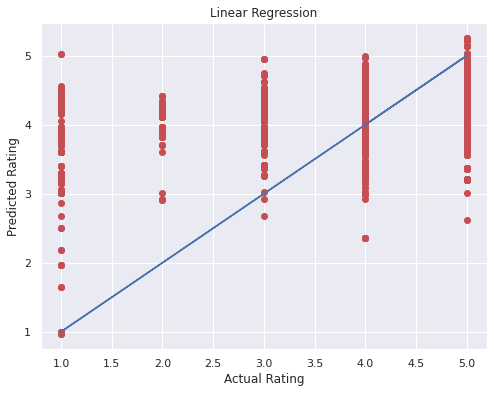

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression')
plt.show()

We can see almost all points are not near or on best fit curve

### Trying other models:

In [67]:
def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",r2_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",r2_score(target_test,model_1_pred_test))
    
    Train_accuracy = r2_score(target_train,model_1_pred_train)
    Test_accuracy = r2_score(target_test,model_1_pred_test)
    
    for j in range(2,10):
        cv_score = cross_val_score(algorithm_instance,feature,target,cv=j)
        cv_mean = cv_score.mean()
        print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
        print("\n")

### Model 2:

In [68]:
import xgboost as xgb
model_selection(xgb.XGBRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.17113317595280508
Accuracy for the testing model :  0.17444362379688338
At cross fold 2 the cv score is -0.12343403113445128 and accuracy score for training is 0.17113317595280508 and accuracy score for testing is 0.17444362379688338


At cross fold 3 the cv score is -0.058073914543146664 and accuracy score for training is 0.17113317595280508 and accuracy score for testing is 0.17444362379688338


At cross fold 4 the cv score is -0.10336752278926181 and accuracy score for training is 0.17113317595280508 and accuracy score for testing is 0.17444362379688338


At cross fold 5 the cv score is -0.061393233342619834 and accuracy score for training is 0.17113317595280508 and accuracy score for testing is 0.17444362379688338


At cross fold 6 the cv score is -0.016782117910114563 and accuracy score for training is 0.17113317595280508 and accuracy score for testing is 0.17444362379688338


At cross fold 7 the cv score is -0.03402924089746944 and accuracy sc

### Model 3:

In [69]:
from sklearn.ensemble import RandomForestRegressor
model_selection(RandomForestRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.18998468920871847
Accuracy for the testing model :  0.17938940743021847
At cross fold 2 the cv score is -0.10493400123583363 and accuracy score for training is 0.18998468920871847 and accuracy score for testing is 0.17938940743021847


At cross fold 3 the cv score is -0.07337683676629532 and accuracy score for training is 0.18998468920871847 and accuracy score for testing is 0.17938940743021847


At cross fold 4 the cv score is -0.13459613243706392 and accuracy score for training is 0.18998468920871847 and accuracy score for testing is 0.17938940743021847


At cross fold 5 the cv score is -0.14386062968595698 and accuracy score for training is 0.18998468920871847 and accuracy score for testing is 0.17938940743021847


At cross fold 6 the cv score is -0.045814215081810515 and accuracy score for training is 0.18998468920871847 and accuracy score for testing is 0.17938940743021847


At cross fold 7 the cv score is -0.07031879867371547 and accuracy scor

### Model 4:

In [80]:
from sklearn.tree import DecisionTreeRegressor
model_selection(DecisionTreeRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.20051157005475173
Accuracy for the testing model :  0.13323484216975012
At cross fold 2 the cv score is -0.11696279466012482 and accuracy score for training is 0.20051157005475173 and accuracy score for testing is 0.13323484216975012


At cross fold 3 the cv score is -0.11592160504260877 and accuracy score for training is 0.20051157005475173 and accuracy score for testing is 0.13323484216975012


At cross fold 4 the cv score is -0.1862613657816336 and accuracy score for training is 0.20051157005475173 and accuracy score for testing is 0.13323484216975012


At cross fold 5 the cv score is -0.18329223971620548 and accuracy score for training is 0.20051157005475173 and accuracy score for testing is 0.13323484216975012


At cross fold 6 the cv score is -0.06491281581682538 and accuracy score for training is 0.20051157005475173 and accuracy score for testing is 0.13323484216975012


At cross fold 7 the cv score is -0.09836990294234552 and accuracy score 

### Conclusion: Here RandomForestRegressor() gives best accuracy. Hence taking DecisionTreeRegressor() as main model for target

### Below we have tested mean squared error, Root mean squared error and Mean Absolute error method also:

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [83]:
# Mean Squared Error Method
x = RandomForestRegressor()
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_squared_error(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_squared_error(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.8406583208001219
At random state 0 the testing accuracy is : 0.8956348464432488


At random state 1 the training accuracy is : 0.8485640387356751
At random state 1 the testing accuracy is : 0.8697747964692955


At random state 2 the training accuracy is : 0.8415663153627211
At random state 2 the testing accuracy is : 0.893991529566731


At random state 3 the training accuracy is : 0.8473607081117945
At random state 3 the testing accuracy is : 0.8779583285502637


At random state 4 the training accuracy is : 0.8469549927624461
At random state 4 the testing accuracy is : 0.880327136552985


At random state 5 the training accuracy is : 0.8464852987055634
At random state 5 the testing accuracy is : 0.8740114737925635


At random state 6 the training accuracy is : 0.8473776478402718
At random state 6 the testing accuracy is : 0.872283701787907


At random state 7 the training accuracy is : 0.834039415475642
At random state 7 the testing accurac

In [84]:
# Root Mean Squared Error Method

for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_squared_error(target_train,pred_train,squared=False)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_squared_error(target_test,pred_test,squared=False)))
    print("\n")

At random state 0 the training accuracy is : 0.9169085009637338
At random state 0 the testing accuracy is : 0.9462176025234725


At random state 1 the training accuracy is : 0.921138891461165
At random state 1 the testing accuracy is : 0.9323608183456085


At random state 2 the training accuracy is : 0.9173046253122492
At random state 2 the testing accuracy is : 0.9457098065468207


At random state 3 the training accuracy is : 0.9206049513780119
At random state 3 the testing accuracy is : 0.9363191242049913


At random state 4 the training accuracy is : 0.9203026577570758
At random state 4 the testing accuracy is : 0.9381087997106695


At random state 5 the training accuracy is : 0.9200590036730867
At random state 5 the testing accuracy is : 0.9354759263161032


At random state 6 the training accuracy is : 0.9205119324556612
At random state 6 the testing accuracy is : 0.9342955014947645


At random state 7 the training accuracy is : 0.9132850026815152
At random state 7 the testing accu

In [85]:
# Mean Absolute Error Method

for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_absolute_error(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_absolute_error(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.6111596668064202
At random state 0 the testing accuracy is : 0.6347239971700054


At random state 1 the training accuracy is : 0.6158899348098144
At random state 1 the testing accuracy is : 0.6307008072326067


At random state 2 the training accuracy is : 0.6149620054846107
At random state 2 the testing accuracy is : 0.6296830870162474


At random state 3 the training accuracy is : 0.6150468680357154
At random state 3 the testing accuracy is : 0.6323983932669209


At random state 4 the training accuracy is : 0.6153944604404121
At random state 4 the testing accuracy is : 0.625930303736945


At random state 5 the training accuracy is : 0.6158891442401815
At random state 5 the testing accuracy is : 0.6279331144967384


At random state 6 the training accuracy is : 0.6157230820712793
At random state 6 the testing accuracy is : 0.6290188581164897


At random state 7 the training accuracy is : 0.6111322144827566
At random state 7 the testing accu

#### Here we can see that r2_score is best among r2_score, mean squared error, Root mean squared error and Mean Absolute error method

### Regularization using Lasso:

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [87]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [88]:
ls = Lasso(alpha = 0.0001, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = mean_squared_error(target_test,pred_ls,squared=False)
lss

0.9589775709392794

In [89]:
cv_score = cross_val_score(ls,feature,target,cv=3)
cv_mean =cv_score.mean()
abs(cv_mean)

0.09738998753231683

### Ensemble technique:

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#using 4 parameters
parameters = {'criterion':['mse','mae'], 'max_features': ["auto","sqrt","log2"], 'min_samples_leaf' : [1,2,4], 'min_samples_split' : [2,5,10]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [94]:
rf = RandomForestRegressor(criterion = "mse", max_features = "auto", min_samples_leaf = 1, min_samples_split = 2)
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score: ', abs(rfs)*100)

rfscore = cross_val_score(ls,feature,target,cv=6)
rfc =rfscore.mean()
rfc
print('Cross Validation score: ', abs(rfc)*100)

R2 score:  18.124530583141855
Cross Validation score:  5.002273821678308


### Conclusion : We got Accuracy as 18.12% for Rating